## Caracterização meteorológica da área de estudo

Autor: Mayara Dargas Sousa

Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

Meteorologia de superfície
Meteorologia upperair ou sondagem/perfil da atmosfera
Superfície - Albedo, razão de Bowen e Rugosidade

## Obtenção de dados 

Analisaremos os dados de metar (estação meteorológica em aeroportos). Os dados foram coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR e referem-se ao período de 01/01/2023 a 01/01/2024 no munícipio de Florinaópolis.
Foi optada por esta estação pois é a mais próxima do munícipio de interesse, Criciúma, onde esta localizada a fábrica da Eliane Revetsimento. Os dados estarão na pasta de inputs/meteoSuperficie com a nomenclatura metar.csv

### Parte 01

1 - Analise da condição meteorológica de superfície (estação meteorológica). Avalie as condições meteorológicas no ano de 2023 e elabore figuras da série temporal bruta e remova os dados discrepantes. Elabore também figuras tipo boxplot e com médias mensais. No gráfico das médias mensais, desenhem a média como uma linha sólida e uma sombra que determine as mínimas e máximas mensais. Use o seguinte pacote para desenhar a sombra: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html. As seguintes condições meteorológicas devem ser analisadas: temperatura, umidade, pressão, cobertura de nuvens. velocidade e direção do vento. Para analisar o vento, elabore a rosa dos ventos. No seu relatório, deve conter uma discussão sobre as condições meteorológicas do local e possíveis reflexos na qualidade do ar.

## Meteorologia de superfície

## Série temporal sem outliers 

C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa
C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa\inputs\meteoSuperficie
['metar_2023.csv']
0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]
                     day  month  year  hour  ct     wd        ws      hc  ccp  \
datetime                                                                        
2023-01-01 00:00:00    1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0   
2023-01-01 01:00:00    1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0   
2023-01-01 02:00:00    1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0   
2023-01-01 03:00:00    1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0   
2023-01-0

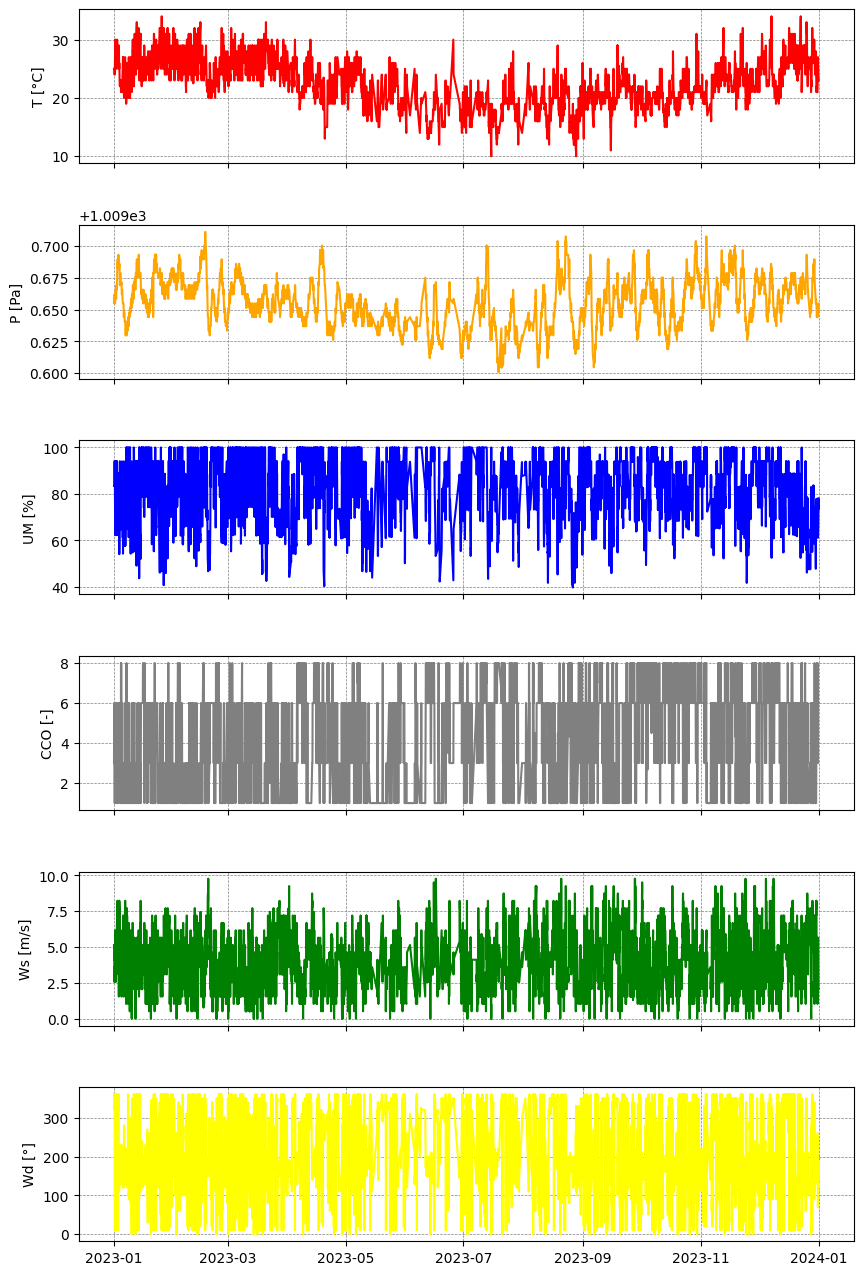

In [159]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = os.path.join(rootPath, 'inputs', 'meteoSuperficie')
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie = []
for file in files:
    metSuperficie.append(pd.read_csv(os.path.join(metSuperficiePath, file)))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])

print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'], inplace=True)
print(metSuperficie)
print(type(metSuperficie))

# Função para remover outliers usando o método do desvio padrão
def remove_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    df_filtered = df[(df[column] >= mean - 3 * std) & (df[column] <= mean + 3 * std)]
    return df_filtered

# Removendo outliers de cada coluna relevante
columns_to_check = ['temp', 'p', 'relh', 'cco', 'ws', 'wd']
for col in columns_to_check:
    metSuperficie = remove_outliers(metSuperficie, col)

# Plotando os gráficos
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 16))

# Adicionar grade de coordenadas fina e cinza
for a in ax:
    a.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Gráfico 1: Temperatura em °C (vermelho)
ax[0].plot(metSuperficie['datetime'], metSuperficie['temp'], color='red')
ax[0].set_ylabel('T [°C]')

# Gráfico 2: Pressão em Pascal (laranja)
ax[1].plot(metSuperficie['datetime'], metSuperficie['p'], color='orange')
ax[1].set_ylabel('P [Pa]')

# Gráfico 3: Umidade relativa do ar em % (azul)
ax[2].plot(metSuperficie['datetime'], metSuperficie['relh'], color='blue')
ax[2].set_ylabel('UM [%]')

# Gráfico 4: CCO (-) (cinza)
ax[3].plot(metSuperficie['datetime'], metSuperficie['cco'], color='gray')
ax[3].set_ylabel('CCO [-]')

# Gráfico 5: Ws (m/s) (verde)
ax[4].plot(metSuperficie['datetime'], metSuperficie['ws'], color='green')
ax[4].set_ylabel('Ws [m/s]')

# Gráfico 6: Wd (°) (amarelo)
ax[5].plot(metSuperficie['datetime'], metSuperficie['wd'], color='yellow')
ax[5].set_ylabel('Wd [°]')

# Ajustando o espaçamento entre os subgráficos
plt.subplots_adjust(hspace=0.4)

plt.show()


C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa
C:\ENS5173_MayaraDargas\ENS5173-2024.1_MayaraDargasSousa\inputs\meteoSuperficie
['metar_2023.csv']
0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]
                     day  month  year  hour  ct     wd        ws      hc  ccp  \
datetime                                                                        
2023-01-01 00:00:00    1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0   
2023-01-01 01:00:00    1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0   
2023-01-01 02:00:00    1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0   
2023-01-01 03:00:00    1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0   
2023-01-0

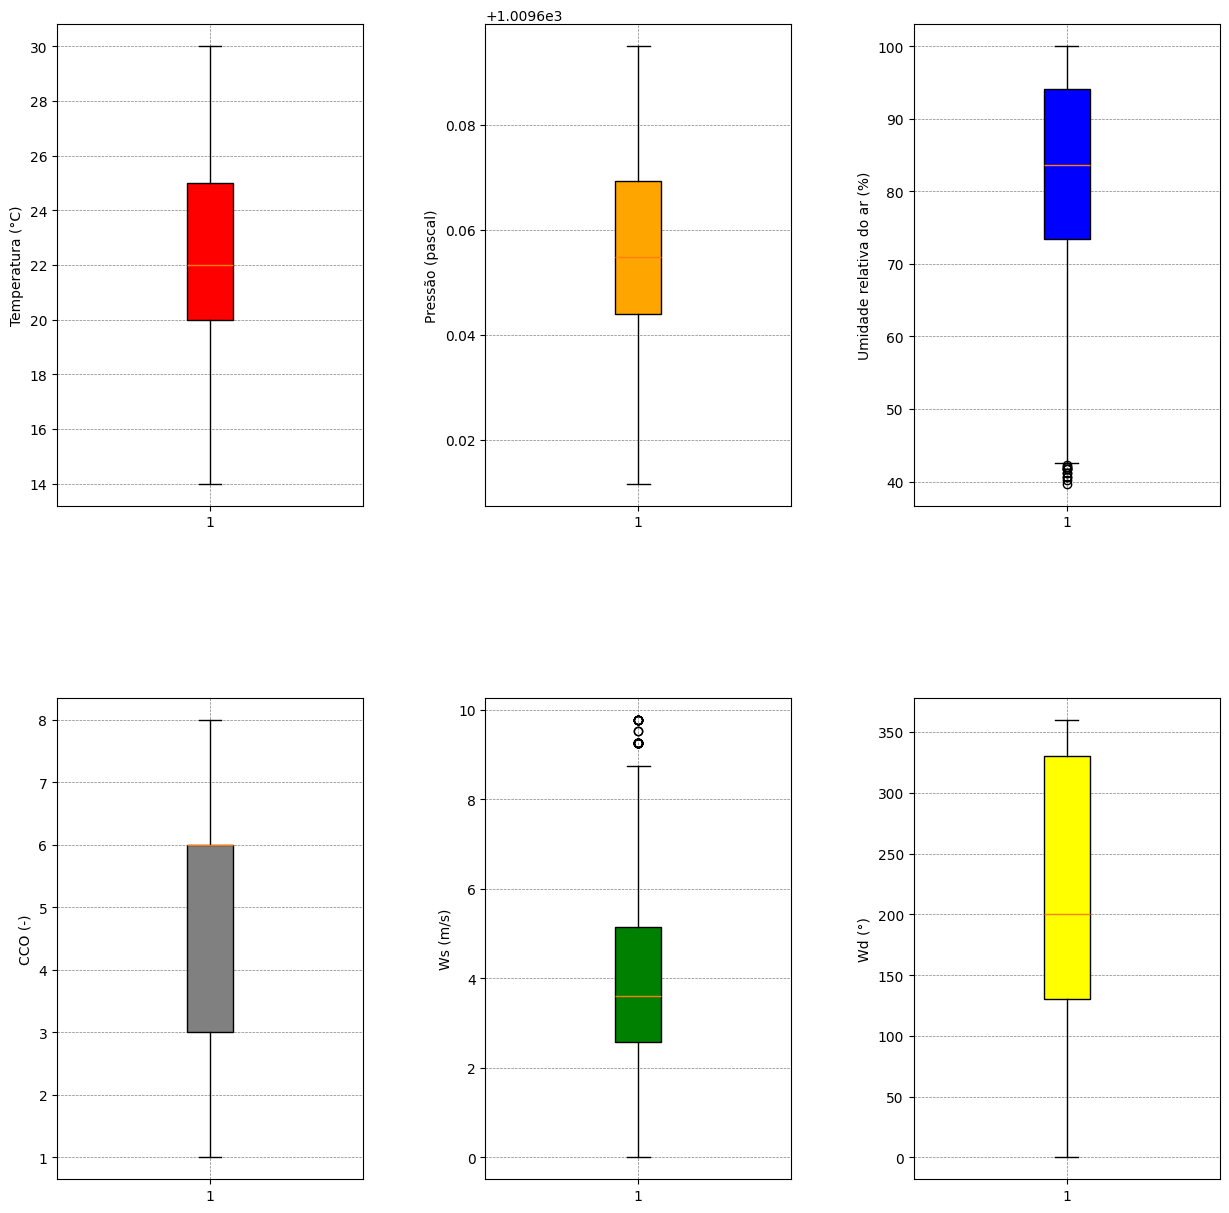

In [160]:
import numpy as np

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = os.path.join(rootPath, 'inputs', 'meteoSuperficie')
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie = []
for file in files:
    metSuperficie.append(pd.read_csv(os.path.join(metSuperficiePath, file)))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])

print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'], inplace=True)
print(metSuperficie)
print(type(metSuperficie))

# Função para remover outliers usando o método do desvio padrão
def remove_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    df_filtered = df[(df[column] >= mean - 3 * std) & (df[column] <= mean + 3 * std)]
    return df_filtered

# Removendo outliers de cada coluna relevante
columns_to_check = ['temp', 'p', 'relh', 'cco', 'ws', 'wd']
for col in columns_to_check:
    metSuperficie = remove_outliers(metSuperficie, col)

# Convertendo a coluna 'datetime' para o tipo datetime
metSuperficie['datetime'] = pd.to_datetime(metSuperficie['datetime'])

# Calculando os percentis 99 para as variáveis
temp99 = np.percentile(metSuperficie['temp'], 99)
print('O percentil 99 da temperatura é:' + str(temp99))
p99 = np.percentile(metSuperficie['p'], 99)
print('O percentil 99 da pressão é:' + str(p99))
Um99 = np.percentile(metSuperficie['relh'], 99)
print('O percentil 99 da Um é:' + str(Um99))
cco99 = np.nanpercentile(metSuperficie['cco'], 99)
print('O percentil 99 da cco é:' + str(cco99))
Ws99 = np.nanpercentile(metSuperficie['ws'], 99)
print('O percentil 99 da Ws é:' + str(Ws99))
Wd99 = np.nanpercentile(metSuperficie['wd'], 99)
print('O percentil 99 da Wd é:' + str(Wd99))

# Criando a figura com 6 subgráficos em uma grade 2x3
fig, ax = plt.subplots(2, 3, figsize=(15, 15))

# Boxplot da temperatura
bp_temp = ax[0, 0].boxplot(metSuperficie['temp'][(metSuperficie['temp'] < temp99) &
                                                 (metSuperficie['temp'] > np.percentile(metSuperficie['temp'], 0.5))],
                           patch_artist=True)
for patch in bp_temp['boxes']:
    patch.set_facecolor('red')
ax[0, 0].set_ylabel('Temperatura (°C)')
ax[0, 0].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Grade fina e cinza

# Boxplot da pressão
bp_p = ax[0, 1].boxplot(metSuperficie['p'][(metSuperficie['p'] < p99) &
                                           (metSuperficie['p'] > np.percentile(metSuperficie['p'], 0.5))],
                        patch_artist=True)
for patch in bp_p['boxes']:
    patch.set_facecolor('orange')
ax[0, 1].set_ylabel('Pressão (pascal)')
ax[0, 1].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Grade fina e cinza

# Boxplot da umidade relativa do ar
bp_relh = ax[0, 2].boxplot(metSuperficie['relh'], patch_artist=True)
for patch in bp_relh['boxes']:
    patch.set_facecolor('blue')
ax[0, 2].set_ylabel('Umidade relativa do ar (%)')
ax[0, 2].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Grade fina e cinza

# Boxplot da CCO
bp_cco = ax[1, 0].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])], patch_artist=True)
for patch in bp_cco['boxes']:
    patch.set_facecolor('gray')
ax[1, 0].set_ylabel('CCO (-)')
ax[1, 0].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Grade fina e cinza

# Boxplot da Ws
bp_ws = ax[1, 1].boxplot(metSuperficie['ws'][~np.isnan(metSuperficie['ws'])], patch_artist=True)
for patch in bp_ws['boxes']:
    patch.set_facecolor('green')
ax[1, 1].set_ylabel('Ws (m/s)')
ax[1, 1].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Grade fina e cinza

# Boxplot da Wd
bp_wd = ax[1, 2].boxplot(metSuperficie['wd'][~np.isnan(metSuperficie['wd'])], patch_artist=True)
for patch in bp_wd['boxes']:
    patch.set_facecolor('yellow')
ax[1, 2].set_ylabel('Wd (°)')
ax[1, 2].grid(True, color='gray', linestyle='--', linewidth=0.5)  # Grade fina e cinza

# Ajustando o espaçamento entre os subgráficos
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Exibindo a figura
plt.show()


    datetime       temp           p       relh       cco        ws          wd
0 2022-01-01  23.945725  386.800445  17.093872  5.154404  1.002288   61.368990
1 2022-01-02   8.333704  558.851928  85.761590  9.032258  0.762331   78.643347
2 2022-01-03  13.699526  931.759879  17.067900  9.521601  2.582731  117.284051
3 2022-01-04  27.543960  151.753129  99.496700  1.610833  2.661761   79.492056
4 2022-01-05  12.386982  542.604488  91.383950  9.764333  4.018666  196.876770


C:\Users\mayar\AppData\Local\Temp\ipykernel_9968\1917028029.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\mayar\AppData\Local\Temp\ipykernel_9968\1917028029.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()
C:\Users\mayar\AppData\Local\Temp\ipykernel_9968\1917028029.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  max_mensal = metSuperficie.resample('M').max()


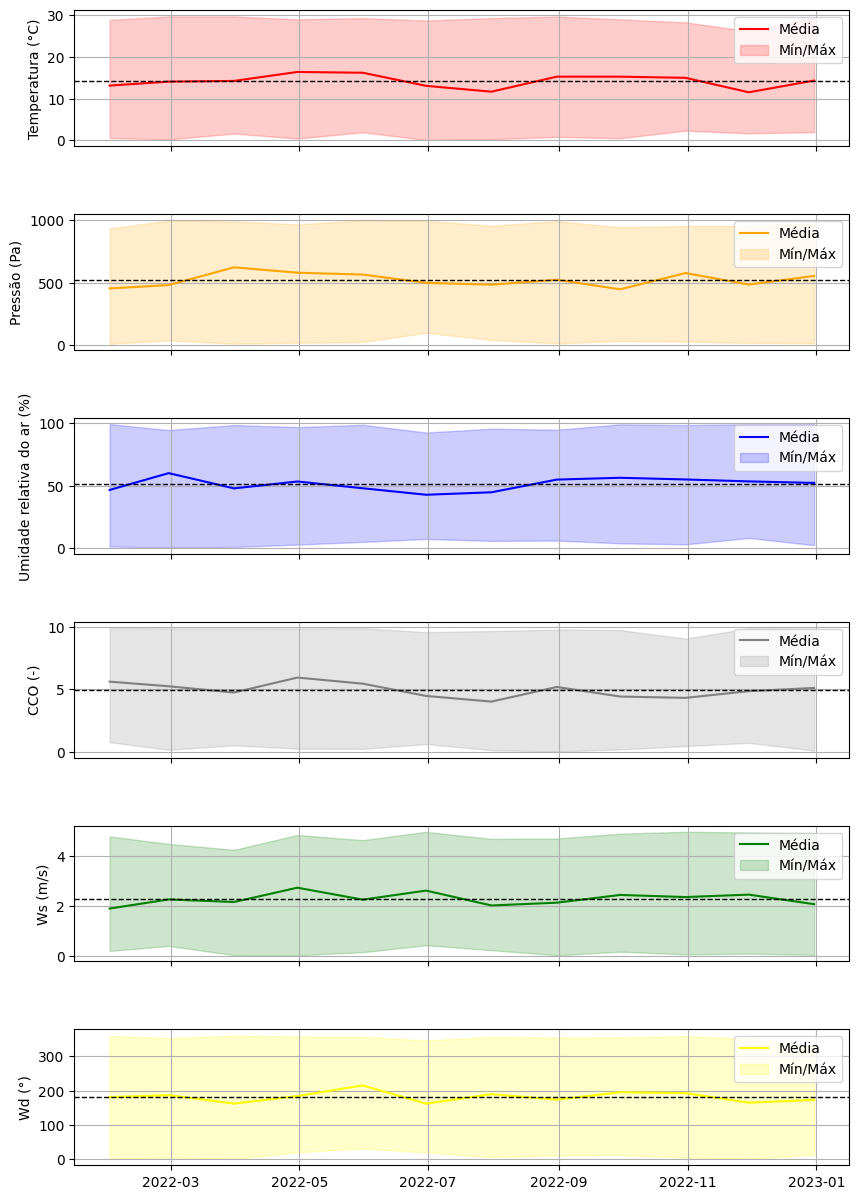

In [161]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Exemplo de estrutura de DataFrame
data = {
    'datetime': pd.date_range(start='2022-01-01', periods=365, freq='D'),
    'temp': np.random.rand(365) * 30,
    'p': np.random.rand(365) * 1000,
    'relh': np.random.rand(365) * 100,
    'cco': np.random.rand(365) * 10,
    'ws': np.random.rand(365) * 5,
    'wd': np.random.rand(365) * 360
}

metSuperficie = pd.DataFrame(data)

# Verificando o DataFrame
print(metSuperficie.head())

# Estatísticas dos dados
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()
max_mensal = metSuperficie.resample('M').max()

# Função para adicionar uma linha média tracejada
def add_mean_line(axis, mean_value, color='black'):
    axis.axhline(y=mean_value, color=color, linestyle='--', linewidth=1)

# Plotando figura após fazer a média mensal
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 15))

# Gráfico 1: Temperatura em °C (vermelho)
ax[0].plot(media_mensal.index, media_mensal['temp'], color='red', label='Média')
ax[0].fill_between(media_mensal.index, min_mensal['temp'], max_mensal['temp'], color='red', alpha=0.2, label='Mín/Máx')
ax[0].set_ylabel('Temperatura (°C)')
add_mean_line(ax[0], media_mensal['temp'].mean(), color='black')
ax[0].grid(True)
ax[0].legend()

# Gráfico 2: Pressão em Pascal (laranja)
ax[1].plot(media_mensal.index, media_mensal['p'], color='orange', label='Média')
ax[1].fill_between(media_mensal.index, min_mensal['p'], max_mensal['p'], color='orange', alpha=0.2, label='Mín/Máx')
ax[1].set_ylabel('Pressão (Pa)')
add_mean_line(ax[1], media_mensal['p'].mean(), color='black')
ax[1].grid(True)
ax[1].legend()

# Gráfico 3: Umidade relativa do ar em % (azul)
ax[2].plot(media_mensal.index, media_mensal['relh'], color='blue', label='Média')
ax[2].fill_between(media_mensal.index, min_mensal['relh'], max_mensal['relh'], color='blue', alpha=0.2, label='Mín/Máx')
ax[2].set_ylabel('Umidade relativa do ar (%)')
add_mean_line(ax[2], media_mensal['relh'].mean(), color='black')
ax[2].grid(True)
ax[2].legend()

# Gráfico 4: CCO (-) (cinza)
ax[3].plot(media_mensal.index, media_mensal['cco'], color='gray', label='Média')
ax[3].fill_between(media_mensal.index, min_mensal['cco'], max_mensal['cco'], color='gray', alpha=0.2, label='Mín/Máx')
ax[3].set_ylabel('CCO (-)')
add_mean_line(ax[3], media_mensal['cco'].mean(), color='black')
ax[3].grid(True)
ax[3].legend()

# Gráfico 5: Ws (m/s) (verde)
ax[4].plot(media_mensal.index, media_mensal['ws'], color='green', label='Média')
ax[4].fill_between(media_mensal.index, min_mensal['ws'], max_mensal['ws'], color='green', alpha=0.2, label='Mín/Máx')
ax[4].set_ylabel('Ws (m/s)')
add_mean_line(ax[4], media_mensal['ws'].mean(), color='black')
ax[4].grid(True)
ax[4].legend()

# Gráfico 6: Wd (°) (amarelo)
ax[5].plot(media_mensal.index, media_mensal['wd'], color='yellow', label='Média')
ax[5].fill_between(media_mensal.index, min_mensal['wd'], max_mensal['wd'], color='yellow', alpha=0.2, label='Mín/Máx')
ax[5].set_ylabel('Wd (°)')
add_mean_line(ax[5], media_mensal['wd'].mean(), color='black')
ax[5].grid(True)
ax[5].legend()

# Ajustando o espaçamento vertical entre os subplots
plt.subplots_adjust(hspace=0.5)

plt.show()


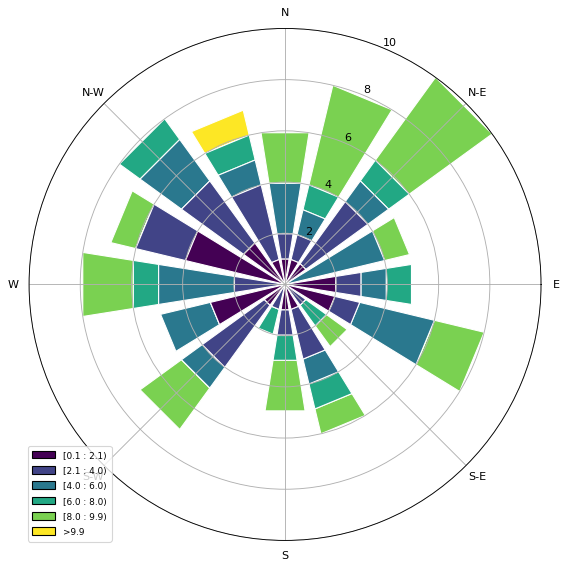

In [156]:
# Criando minha rosa dos ventos para avaliar a direção do vento
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

# Discussão dos relfexos das condições metereológicas na qualidade do ar

## Parte 02

2 - Análise do perfil de temperatura. Analise o perfil de temperatura da estação de monitoramento no aeroporto de Florianópolis utilizando o paco Siphon do Python. Analise os dados de 0 e 12 horas durante10 dias, sendo 5 no verão e 5 no inverno. Determine os pontos de inversão e possível altura da camada limite. Avalie a evolução da camada limite ao longo do dia e entre as estações do ano.

meia noite e 12h em 10 dias, 5 de inverno e 5 de verão, ou seja: 20 gráficos 

# Análise upperair/sondagem/perfil da atmosfera

Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

In [124]:
#from datetime import datetime

#!pip install siphon

#from siphon.simplewebservice.wyoming import WyomingUpperAir

# Data para análise
#date = datetime(2023, 1, 10, 12)
# local da análise
#station = 'SBFL'

# Extraindo os dados
#df = WyomingUpperAir.request_data(date, station)
#print(df)

#Resumindo, essa função extrai dados de radiossondagem de uma estação meteorológica específica em uma determinada data e hora e os armazena em um DataFrame para análise posterior

In [125]:
# Fazendo figura do perfil de temperatura
#fig,ax = plt.subplots()
#ax.plot(df['temperature'],df['height'])

In [126]:
import random
from datetime import datetime, timedelta
!pip install siphon

from siphon.simplewebservice.wyoming import WyomingUpperAir

# Função para gerar datas aleatórias em um intervalo de dias
def random_dates(start_date, end_date, n):
    delta = end_date - start_date
    return [start_date + timedelta(days=random.randint(0, delta.days)) for _ in range(n)]

# Definindo intervalos para verão e inverno
# Verão no Hemisfério Sul (21 de dezembro a 20 de março)
summer_start = datetime(2023, 12, 21)
summer_end = datetime(2024, 3, 20)

# Inverno no Hemisfério Sul (21 de junho a 20 de setembro)
winter_start = datetime(2023, 6, 21)
winter_end = datetime(2023, 9, 20)

# Gerando 5 datas aleatórias para verão e inverno
summer_dates = random_dates(summer_start, summer_end, 5)
winter_dates = random_dates(winter_start, winter_end, 5)

# Estação de análise
station = 'SBFL'

# Função para extrair dados para uma lista de datas
def extract_data(dates, times, station):
    data = {}
    for date in dates:
        for time in times:
            datetime_obj = datetime(date.year, date.month, date.day, time)
            try:
                df = WyomingUpperAir.request_data(datetime_obj, station)
                data[datetime_obj] = df
            except Exception as e:
                print(f"Falha ao obter dados para {datetime_obj}: {e}")
    return data

# Horários de interesse (00h e 12h)
times = [0, 12]

# Extraindo dados
summer_data = extract_data(summer_dates, times, station)
winter_data = extract_data(winter_dates, times, station)

# Imprimindo os dados extraídos
for datetime_obj, df in summer_data.items():
    print(f"Dados para {datetime_obj} (Verão):")
    print(df)
    print("\n")

for datetime_obj, df in winter_data.items():
    print(f"Dados para {datetime_obj} (Inverno):")
    print(df)
    print("\n")


Dados para 2024-01-11 00:00:00 (Verão):
    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1011.0       5         27.6      23.6       20.0    2.0  -0.684040   
1     1000.0     101         27.0      23.3       15.0    7.0  -1.811733   
2      972.0     352         25.0      21.8      353.0    7.0   0.853085   
3      956.0     499         25.4      20.5      340.0    6.0   2.052121   
4      925.0     789         24.2      18.2      315.0    6.0   4.242641   
..       ...     ...          ...       ...        ...    ...        ...   
86      75.6   18288        -74.4     -80.4      335.0   18.0   7.607129   
87      75.2   18321        -74.5     -80.5      332.0   17.0   7.981017   
88      71.8   18593        -72.3     -79.6      305.0   12.0   9.829825   
89      70.0   18740        -71.1     -79.1      280.0   13.0  12.802501   
90      68.8   18843        -70.1     -78.1        NaN    NaN        NaN   

       v_wind station  station_number       tim

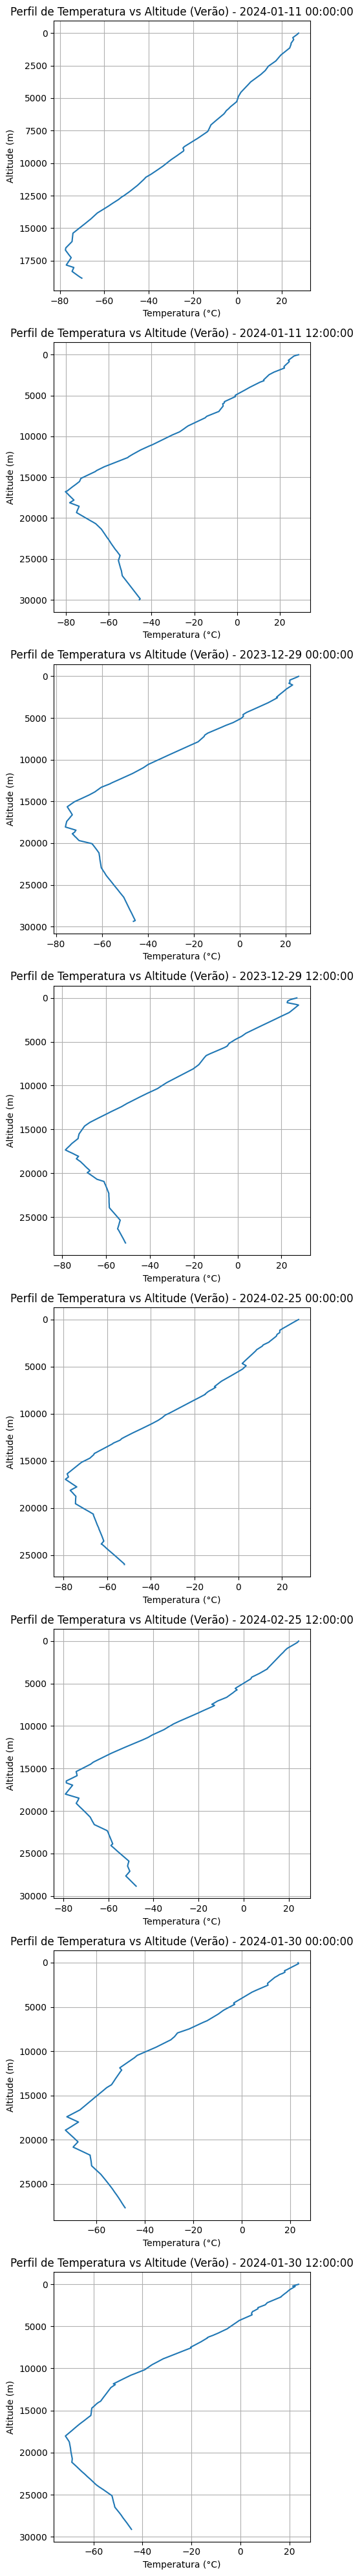

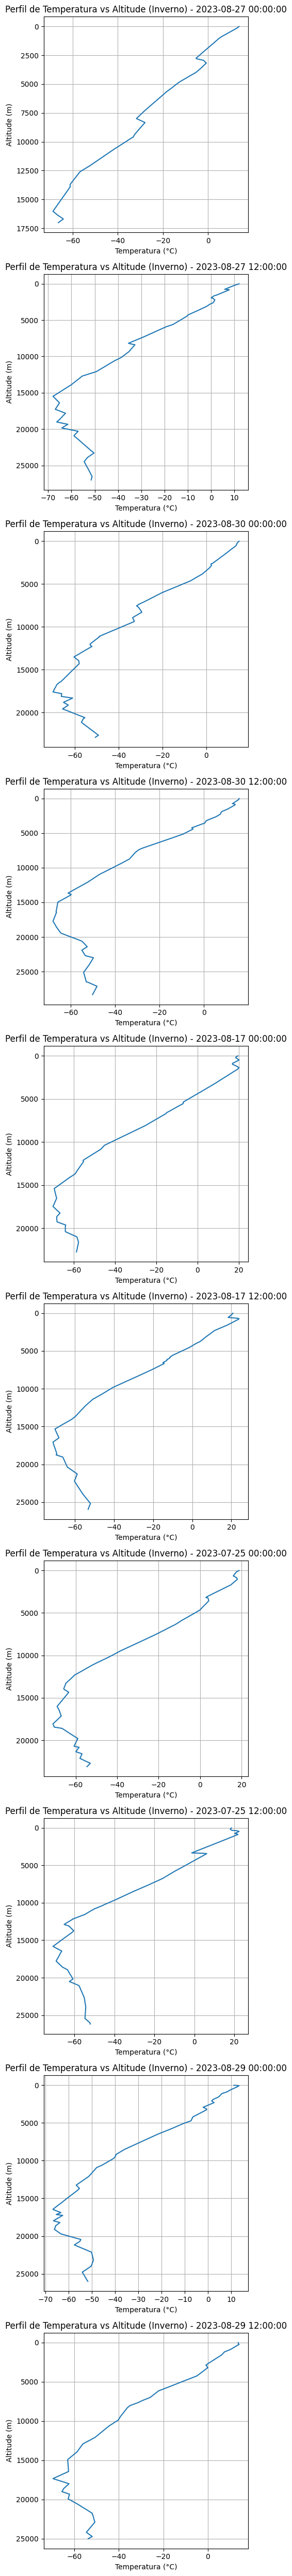

In [127]:
# Função para plotar o gráfico de temperatura versus altitude
def plot_temperature_altitude(data, season):
    fig, axes = plt.subplots(len(data), 1, figsize=(5, len(data) * 5))
    if len(data) == 1:
        axes = [axes]  # Para lidar com o caso de um único gráfico
    for ax, (datetime_obj, df) in zip(axes, data.items()):
        ax.plot(df['temperature'], df['height'])
        ax.set_title(f"Perfil de Temperatura vs Altitude ({season}) - {datetime_obj}")
        ax.set_xlabel("Temperatura (°C)")
        ax.set_ylabel("Altitude (m)")
        ax.grid(True)
        ax.invert_yaxis()  # Inverter o eixo y para que a altitude cresça para cima
    plt.tight_layout()
    plt.show()

# Plotar gráficos para o verão
plot_temperature_altitude(summer_data, "Verão")

# Plotar gráficos para o inverno
plot_temperature_altitude(winter_data, "Inverno")

[ 0.09389671  1.17647059 -0.59654631 -0.85106383 -0.32432432 -0.55111111
 -0.48387097  0.60606061  0.10416667  0.52631579 -0.46666667 -0.8988764
 -0.91603053 -0.45045045 -0.45       -0.88772846 -0.73529412 -0.96256684
 -0.44117647 -0.27726433 -0.2303263  -0.57803468 -0.54945055 -0.43243243
 -0.65773447 -0.25768087 -0.42726348  0.02636783 -0.77464789 -0.77319588
  1.04651163  1.12244898  1.08303249 -0.39855072 -0.37900875 -0.22988506
 -0.16759777 -0.25210084  1.07692308  1.03846154  0.         -0.1
 -0.1059322   0.54545455  0.71428571  0.63218391  0.6147541   0.54263566
  0.56390977  0.58394161  0.56338028  0.55776892  0.          0.12658228
  0.12121212  0.05952381  0.11560694  0.1119403  -0.28673835 -0.31088083
 -0.29268293 -0.2764977   0.5         0.41666667 -0.63953488 -0.7       ]


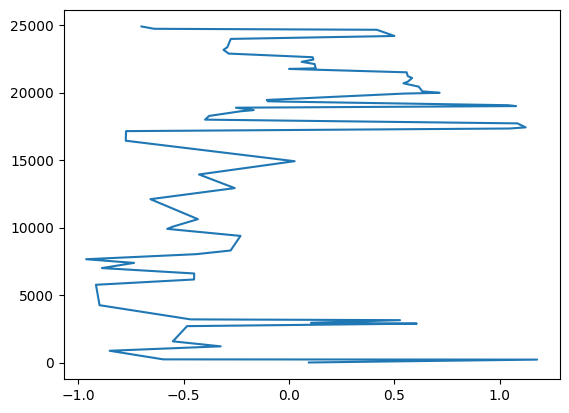

In [128]:
# Calcular gradiente de temperatura

deltaT = np.diff(df['temperature'])
deltaZ = np.diff(df['height'])

dTdZ= (deltaT/deltaZ)*100 # a cada 100 m
print(dTdZ)

fig,ax = plt.subplots()
ax.plot(dTdZ,df['height'][:-1])

KeyError: 'inversion'

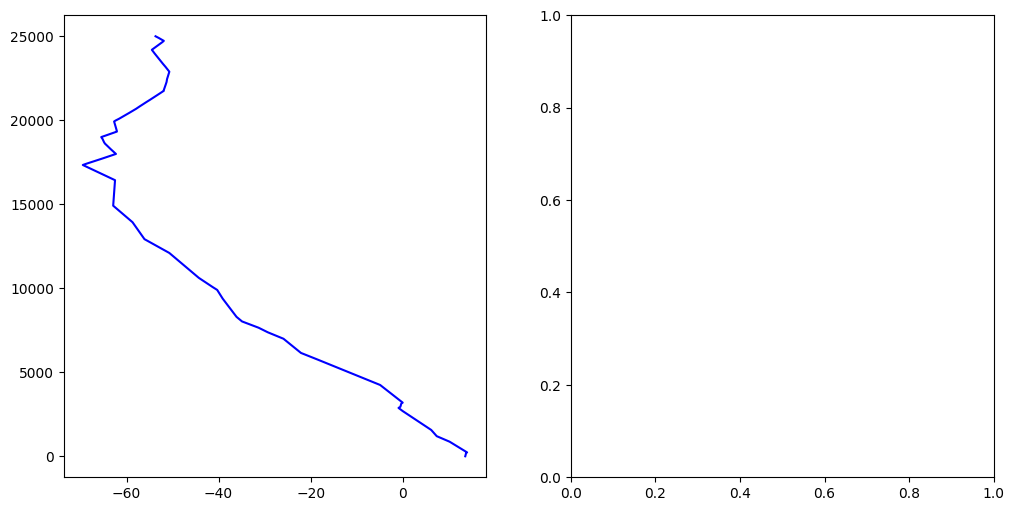

In [129]:

# Figura
fig3, ax3 = plt.subplots(1, 2, figsize=(12, 6))
# Gráfico de temperatura em relação à altitude
ax3[0].plot(df.temperature, df.height, label='Temperatura', color='blue', linestyle='-')
ax3[0].scatter(df['inversion'], df['height'], color='red', marker='o', s=50, label='Inversão')
ax3[0].set_ylabel('Altitude (m)')
ax3[0].set_xlabel('Temperatura (°C)')
ax3[0].set_title('Perfil Vertical de Temperatura')
ax3[0].legend()
# Adiciona uma linha de base para identificar instabilidade e estabilidade
ax3[1].axvline(x=0, color='gray', linestyle='--', label='Inversão')
# Identifica regiões de instabilidade e estabilidade
unstable_region = dTdZ < -0.98
stable_region = dTdZ >= -0.98
ax3[1].fill_betweenx(df['height'][:-1], dTdZ, where=unstable_region, color='red', alpha=0.3, label='Instabilidade')
ax3[1].fill_betweenx(df['height'][:-1], dTdZ, where=stable_region, color='green', alpha=0.3, label='Estabilidade')
ax3[1].set_ylabel('Altitude (m)')
ax3[1].set_xlabel('Variação Percentual de Temperatura por Variação de Altitude')
ax3[1].set_title('Perfil Vertical de Estabilidade')
ax3[1].legend()
output_dir = os.path.join(root_path, 'data', 'met', 'outputs')
os.makedirs(output_dir, exist_ok=True)
fig_file_path = os.path.join(output_dir, f'{date.year}{date.month:02}{date.day:02}_{date.hour:02}.png')
plt.tight_layout()
plt.savefig(fig_file_path)
plt.show()

In [ ]:
import random
from datetime import datetime, timedelta
from siphon.simplewebservice.wyoming import WyomingUpperAir
import matplotlib.pyplot as plt

# Definindo os períodos das estações do ano (hemisfério sul)
summer_start = datetime(2023, 12, 21)
summer_end = datetime(2024, 3, 20)
winter_start = datetime(2023, 6, 21)
winter_end = datetime(2023, 9, 23)

# Função para gerar uma data aleatória em uma estação do ano
def random_date_in_season(season_start, season_end):
    days_in_season = (season_end - season_start).days
    random_days = random.randint(0, days_in_season)
    random_date = season_start + timedelta(days=random_days)
    return random_date

# Listas para armazenar as datas
summer_dates = []
winter_dates = []

# Gerando 5 datas aleatórias no verão e no inverno
for _ in range(5):
    random_summer_date = random_date_in_season(summer_start, summer_end)
    random_winter_date = random_date_in_season(winter_start, winter_end)
    # Adicionando 12h e 00h para cada data
    summer_dates.append(random_summer_date.replace(hour=12))
    summer_dates.append(random_summer_date.replace(hour=0))
    winter_dates.append(random_winter_date.replace(hour=12))
    winter_dates.append(random_winter_date.replace(hour=0))

# Variável da estação (exemplo: 'SBFL' para Florianópolis)
station = 'SBFL'

# Função para extrair e plotar os dados de uma data específica
def plot_temperature_profile(dates, station, season_name):
    fig, axes = plt.subplots(len(dates)//2, 2, figsize=(15, 10))
    fig.suptitle(f'Perfis de Temperatura - {season_name}', fontsize=16)

    for i in range(0, len(dates), 2):
        for j in range(2):
            date = dates[i + j]
            try:
                df = WyomingUpperAir.request_data(date, station)
                ax = axes[i//2, j]
                ax.plot(df['temperature'], df['height'], marker='o', linestyle='-')
                ax.set_xlabel('Temperatura (°C)')
                ax.set_ylabel('Altura (m)')
                ax.set_title(f'{date.strftime("%d-%m-%Y %H:%M")}')
                ax.grid(True)
            except Exception as e:
                ax.text(0.5, 0.5, 'Erro ao obter dados', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
                print(f'Erro ao obter dados para {date}: {e}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Criando gráficos para datas de verão
plot_temperature_profile(summer_dates, station, 'Verão')

# Criando gráficos para datas de inverno
plot_temperature_profile(winter_dates, station, 'Inverno')


# Análise de dados no espaço

Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica

In [ ]:
# Instalar o módulo netCDF4
!pip install netCDF4

from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-28, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface'] # Podem analisar outras variáveis. 

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55., -47., -28, -25])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')

plt.show()


16- Vocês precisam analisar o arquivo METEO.SFC. A página 83 (ou 2-54) do user guide do AERMET detalha cada coluna deste arquivo: https://www.epa.gov/sites/default/files/2020-09/documents/aermet_userguide.pdf. Abra este arquivo no libreoffice ou excel e converta para .csv. substitua o cabeçalho para facilitar sua vida. 
17 - Abra no python para analisar as variáveis desta atividade. 

1-5 ano (2 dígitos), mês, dia, dia juliano e hora
6 fluxo de calor sensível (W/m2)
7 velocidade de fricção da superfície (m/s)
8 escala de velocidade convectiva (definida como -9.0 para atmosfera estável) (m/s)
9 gradiente de temperatura potencial acima da altura de mistura (K/m)
10 altura de mistura impulsionada por convecção (definida como -999. para atmosfera estável) (m)
11 altura de mistura impulsionada mecanicamente (calculada para todas as horas) (m)
12 comprimento de Monin-Obukhov (m)
13 comprimento de rugosidade da superfície (dependente do mês e direção do vento) (m)
14 razão de Bowen (dependente do mês e direção do vento) (adimensional)
15 albedo (dependente do mês e direção do vento; 1.0 para horas antes do nascer do sol ou após o pôr do sol) (adimensional)
16-18 velocidade do vento, direção do vento e altura do anemômetro usados nos cálculos na Etapa 3 (m/s, graus, m)
19-20 temperatura e altura de medição usadas nos cálculos na Etapa 3 (K e m)
21 código de tipo de precipitação
22 quantidade de precipitação (mm/hr)
23 umidade relativa (%)
24 pressão atmosférica da estação (mb)
25 cobertura de nuvens (décimos)
26 ajuste de velocidade do vento e sinalizador da fonte de dados
27 cobertura de nuvens e substituição de temperatura por interpolação








 # EZ-AERMET

In [ ]:
# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
meteoSFC = rootPath +'\\inputs\\meteoSFC'
print(meteoSFC)

# Listando os arquivos dentro do diretório
files = os.listdir(meteoSFC)
print(files)

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSFC=[]
for file in files:
    metSFC.append(pd.read_csv(meteoSFC+'\\'+file))

# Convertendo metSFC para DataFrame
metSFC = pd.concat(metSFC)

print(metSFC)
print(type(metSFC))